In [1]:
from cdk.analysis.cytosol import platereader as pr
import pandas as pd
import warnings

# Ignore warnings
warnings.filterwarnings('ignore')

# Initialize plotting
pr.plot_setup()

# Day 4: tRNA and Protein Mix Buffer Poisoning

Provide a CSV file containing the data, and a platemap. This function returns both the data with the plate map mapped to it, and the platemap by itself, which is useful for certain tasks.

In [2]:
platemap_path = "../1-design/PURE Workshop 1 Worksheets - Thu - platemap - tRNA-edit.tsv"
data_path = "../2-data/20250515-210208-pure-timecourse-gfp-redteam-buffer-debug-trna-biotek-cdk.txt"

data, platemap = pr.load_platereader_data(data_path, platemap_path)

# Basic Plots

## Kinetics 
Kinetic time traces of every well on the plate

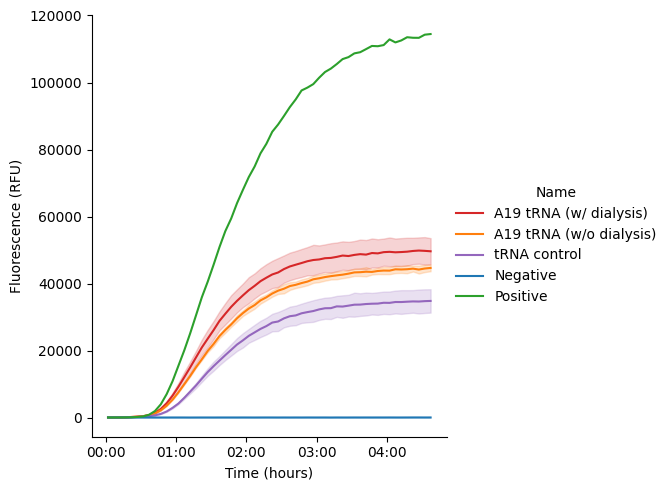

In [3]:
#| label: day4-kinetics

exp_data = data[data["Type"]=="Experiment"]
ctl_data = data[data["Type"]=="Control"]
combined_data = pd.concat([exp_data, ctl_data])

names_to_remove = ['NEB Protein + (uL)']

replace_dict = {'Workshop A19 tRNA (AH w/ dialysis)':'A19 tRNA (w/ dialysis)',
                'Workshop A19 tRNA (AH w/o dialysis)':'A19 tRNA (w/o dialysis)',
                'NEB SM control (uL)':'tRNA control',
                'NEB -DNA (uL)':'Negative',
                'NEB +DNA (uL)':'Positive'}

custom_order = ['A19 tRNA (w/ dialysis)', 
                'A19 tRNA (w/o dialysis)',
                'tRNA control'
                'Positive', 
                'Negative']

color_map = {'A19 tRNA (w/ dialysis)':'#d62728',
                'A19 tRNA (w/o dialysis)':'#ff7f0e',
                'tRNA control':'#9467bd',
                'Positive':'#2ca02c',
                'Negative':'#1f77b4'
               }

# drop_data = combined_data[combined_data["Type"] != "Control*"]
data_drop = combined_data.drop(combined_data[combined_data['Name'].isin(names_to_remove)].index)
data_drop['Name'] = data_drop['Name'].replace(replace_dict)
pr.plot_curves(data_drop, palette=color_map);

## Steady state
Bar graph of steady-state endpoint of each sample. Steady state is calculated as the maximum fluorescence value over a 3-sample rolling average on the data.

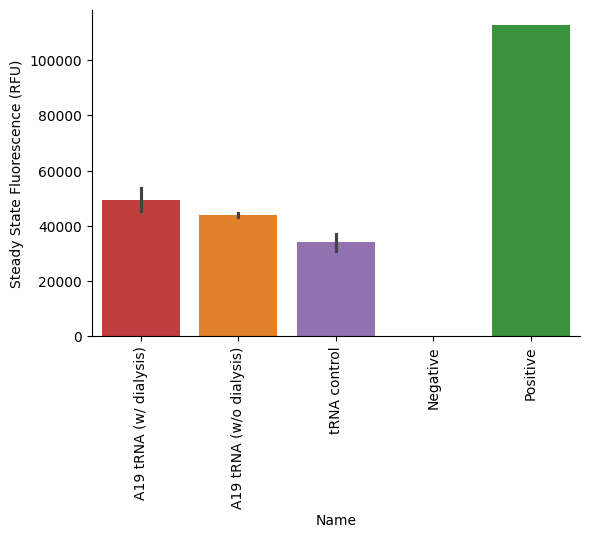

In [4]:
#| label: day4-steadystate


exp_data = data[data["Type"]=="Experiment"]
ctl_data = data[data["Type"]=="Control"]
combined_data = pd.concat([exp_data, ctl_data])

pr.plot_steadystate(data_drop, palette=color_map);

## Buffer poisoning

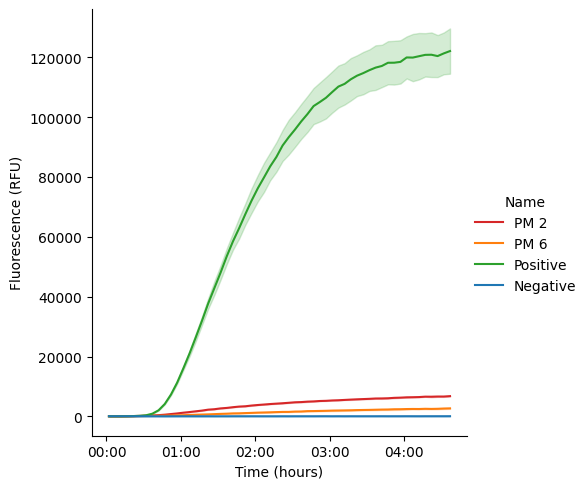

In [9]:
#| label: day4-kinetics-BE


platemap_path_1 = "../1-design/PURE Workshop 1 Worksheets - Thu - platemap - BE + Poison.tsv"
data_path_1 = "../2-data/20250515-210208-pure-timecourse-gfp-redteam-buffer-debug-trna-biotek-cdk.txt"

data_1, platemap_1 = pr.load_platereader_data(data_path_1, platemap_path_1)

exp_data_1 = data_1[data_1["Type"]=="Experiment"]
ctl_data_1 = data_1[data_1["Type"]=="Control"]
combined_data_1 = pd.concat([exp_data_1, ctl_data_1])

names_to_remove = ['NEB Protein + (uL)',
                   'OnePot BE #1 + IF2',
                   'OnePot BE #1 + T7 RNAP',
                   'OnePot #1 +ve',
                   'OnePot #2 +ve',
                   'OnePot -ve',
                   'OnePot BE #1',
                   'OnePot BE #2'
                  ]

replace_dict = {'Poison A':'PM 2',
                'Poison B':'PM 6',
                'NEB -DNA (uL)':'Negative',
                'NEB +DNA (uL)':'Positive'}

custom_order = ['PM 2', 
                'PM 6',
                'Positive', 
                'Negative']

color_map = {'PM 2':'#d62728',
             'PM 6':'#ff7f0e',
             'Positive':'#2ca02c',
             'Negative':'#1f77b4'
               }


data_drop_1 = combined_data_1.drop(combined_data_1[combined_data_1['Name'].isin(names_to_remove)].index)
data_drop_1['Name'] = data_drop_1['Name'].replace(replace_dict)
pr.plot_curves(data_drop_1, palette=color_map);

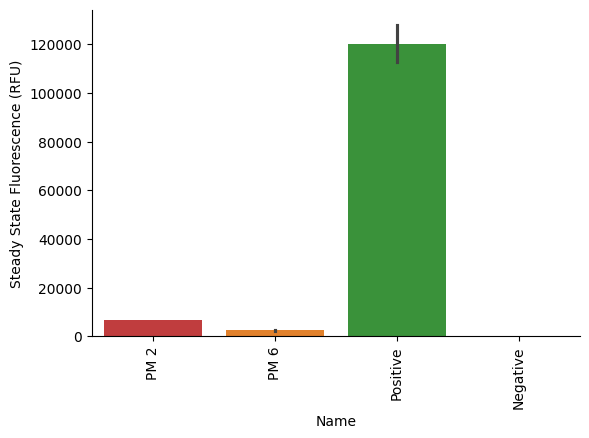

In [10]:
#| label: day4-steadystate-BE

pr.plot_steadystate(data_drop_1, palette=color_map);